<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA012-FrameworksIA/blob/main/02_Regrecao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 - Regressão

---

# Exercício 02: Wine dataset

#### 1. Importação das bibliotecas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

---
#### 2. Importação dos dados

In [4]:
from sklearn.datasets import load_wine

data = load_wine()

print(data)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
#data = pd.read_csv('transistorDataClean.csv').values

---
#### 3. Visualização dos dados

In [ ]:
# Interessam as colunas 1 e 2, precisa converter para inteiro
Y = data[:,1].astype(int)
X = data[:,2].astype(int)

In [ ]:
# Número de linhas e colunas
data.data.shape

(103, 4)

#### 4. Pré-processamento dos dados


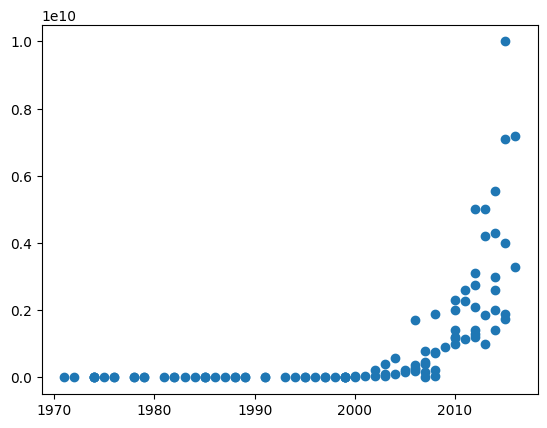

In [ ]:
# Dados nao lineares
plt.scatter(X, Y)

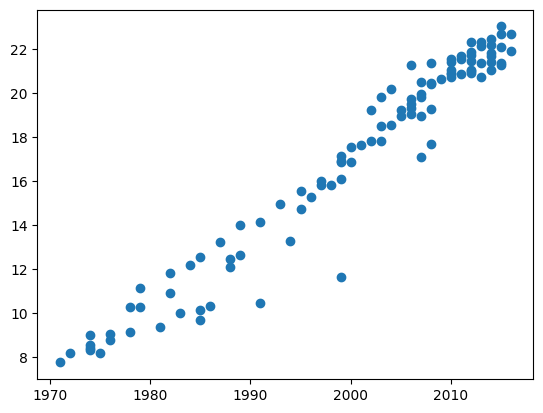

In [ ]:
# Linearização (aplicação do log)
Y = np.log(Y)
plt.scatter(X, Y)

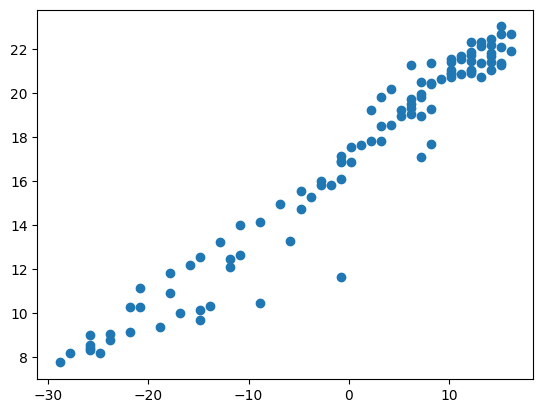

In [ ]:
# Centralizar os dados de X pela média
X = X - X.mean()
plt.scatter(X, Y)

#### 5. Criação do Modelo

In [ ]:
model = tf.keras.models.Sequential(  [
	tf.keras.layers.Input(shape=(1,)),
	tf.keras.layers.Dense(1)
]  )

#### 6. Compilação do Modelo

In [ ]:
model.compile(
     optimizer=tf.keras.optimizers.SGD(
                           learning_rate=0.001,
                           momentum=0.9),
     loss='mse')

#### 7. Treinamento do Modelo

In [ ]:
r = model.fit(X, Y, epochs=200, validation_split=0.3)

Epoch 1/200
3/3 [==============================] - 3s 493ms/step - loss: 264.4353 - val_loss: 448.3443
Epoch 2/200
3/3 [==============================] - 0s 109ms/step - loss: 253.1443 - val_loss: 397.7086
Epoch 3/200
3/3 [==============================] - 0s 118ms/step - loss: 221.0897 - val_loss: 734.3766
Epoch 4/200
3/3 [==============================] - 0s 74ms/step - loss: 229.1839 - val_loss: 569.6972
Epoch 5/200
3/3 [==============================] - 0s 92ms/step - loss: 195.3195 - val_loss: 341.0076
Epoch 6/200
3/3 [==============================] - 0s 79ms/step - loss: 186.1070 - val_loss: 418.7097
Epoch 7/200
3/3 [==============================] - 0s 75ms/step - loss: 165.3190 - val_loss: 460.8891
Epoch 8/200
3/3 [==============================] - 0s 78ms/step - loss: 150.1889 - val_loss: 270.4052
Epoch 9/200
3/3 [==============================] - 0s 85ms/step - loss: 141.3911 - val_loss: 276.4570
Epoch 10/200
3/3 [==============================] - 0s 65ms/step - loss: 120.39

#### 8.Avaliação do modelo

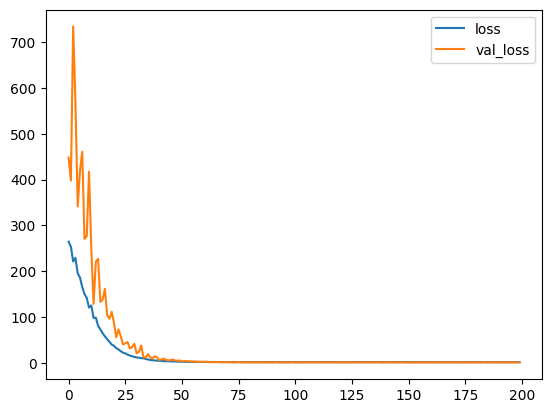

In [ ]:
# Plotar a função de perda
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

#### 9. Efetuando predições

4/4 [==============================] - 0s 4ms/step


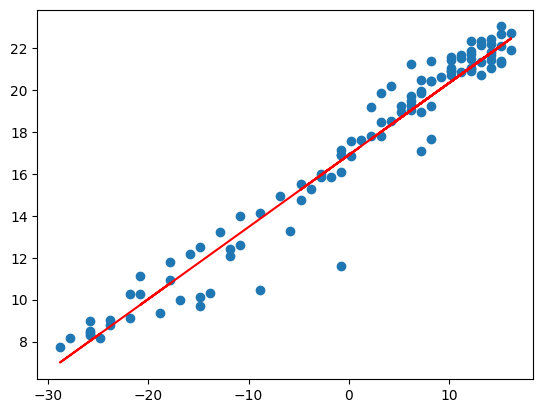

In [ ]:
# Predições e mostrar a reta de regressão
Y_pred = model.predict(X).flatten()

plt.scatter(X, Y)
plt.plot(X, Y_pred, "-r")

#### 10. Salvar o modelo

In [ ]:
model.save('modelo_reg_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#### 11. Carregar o modelo


4/4 [==============================] - 0s 4ms/step


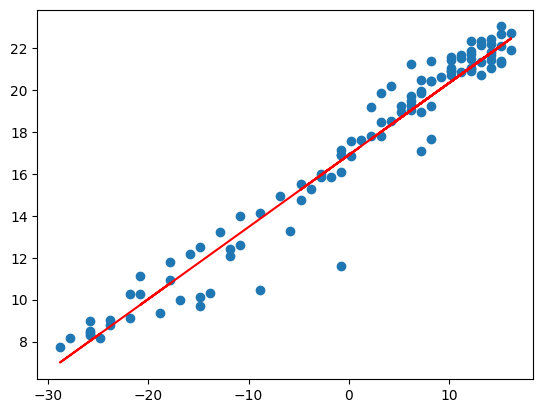

In [ ]:
modelo_1 = tf.keras.models.load_model('modelo_reg_1.h5')
print(modelo_1.layers)

modelo_Y = modelo_1.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, modelo_Y, "-r")

---
# Prática 2: Predição de biomassa de árvores

#### 1. Importação das bibliotecas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [ ]:
# Verificar versão do TensorFlow
tf.__version__

'2.15.0'

#### 2. Importação dos dados

In [ ]:
!wget http://www.razer.net.br/datasets/Biomassa_REG.csv

--2024-07-04 19:36:14--  http://www.razer.net.br/datasets/Biomassa_REG.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82988 (81K) [text/csv]
Saving to: ‘Biomassa_REG.csv.4’

Biomassa_REG.csv.4  100%[===================>]  81.04K   229KB/s    in 0.4s    

2024-07-04 19:36:15 (229 KB/s) - ‘Biomassa_REG.csv.4’ saved [82988/82988]



In [ ]:
data = pd.read_csv("Biomassa_REG.csv", sep=";", decimal=",").values

In [ ]:
# Só nos interessa as colunas de 1 a 4 (X) e coluna 4 (Y)
X = data[:,0:3].astype(float)
Y = data[:,3].astype(float)

#### 3. Separação da base em treino e teste (75/25)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                      test_size=0.25)

In [ ]:
# Criando variáveis de treino e teste para DAP (diâmetro) e altura
dap_train = x_train[:,0]
h_train   = x_train[:,1]

dap_test = x_test[:,0]
h_test   = x_test[:,1]

#### 4. Criação do modelo

In [ ]:
# 3 camadas
i = tf.keras.layers.Input(shape=(3,))
x = tf.keras.layers.Dense(50, activation="relu")(i)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.models.Model(i, x)

#### 5. Compilação e treinamento do modelo

In [ ]:
# Criação de funções para as métricas R2 e RMSE serem inseridas no modelo
def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean( backend.square(y_pred - y_true), axis=-1) )

def r2(y_true, y_pred):
  media = backend.mean(y_true)
  num   = backend.sum (backend.square(y_true - y_pred))
  den   = backend.sum (backend.square(y_true - media))
  return (1.0 - num/den)

In [ ]:
# Compilação
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
# optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
# optimizer=tf.keras.optimizers.RMSprop(0.01)

model.compile(optimizer=optimizer,
              loss="mse",
              metrics=[rmse, r2])

In [ ]:
# Early stop para epochs
early_stop = tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=20,
                            restore_best_weights=True)

In [ ]:
r = model.fit(x_train, y_train,
              epochs=1500,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Epoch 1/1500
94/94 [==============================] - 1s 7ms/step - loss: 9559395.0000 - rmse: 1426.8776 - r2: -0.1392 - val_loss: 8236978.5000 - val_rmse: 1545.5670 - val_r2: -0.4174
Epoch 2/1500
94/94 [==============================] - 0s 4ms/step - loss: 7450489.5000 - rmse: 1374.1135 - r2: 0.2213 - val_loss: 6946432.0000 - val_rmse: 1134.4495 - val_r2: -0.0092
Epoch 3/1500
94/94 [==============================] - 1s 9ms/step - loss: 6297347.0000 - rmse: 1010.5560 - r2: -0.3896 - val_loss: 6618535.5000 - val_rmse: 1167.0728 - val_r2: -0.4923
Epoch 4/1500
94/94 [==============================] - 1s 13ms/step - loss: 5756883.5000 - rmse: 892.3372 - r2: 0.1477 - val_loss: 5918356.5000 - val_rmse: 869.7104 - val_r2: -0.1091
Epoch 5/1500
94/94 [==============================] - 1s 13ms/step - loss: 5416625.0000 - rmse: 825.5337 - r2: -0.0121 - val_loss: 5674380.0000 - val_rmse: 772.0697 - val_r2: 0.0469
Epoch 6/1500
94/94 [==============================] - 1s 7ms/step - loss: 5215408.500

#### 6. Avaliação do modelo

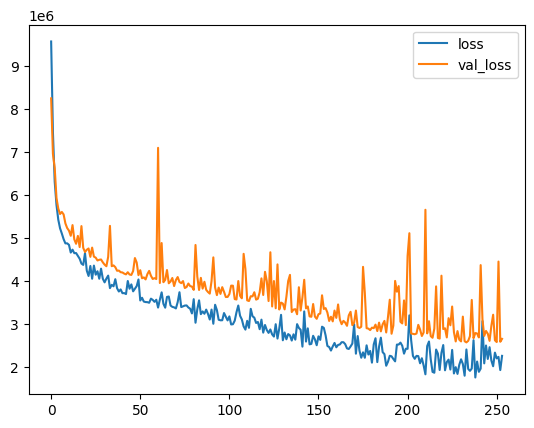

In [ ]:
plt.plot( r.history["loss"], label="loss" )
plt.plot( r.history["val_loss"], label="val_loss" )
plt.legend()


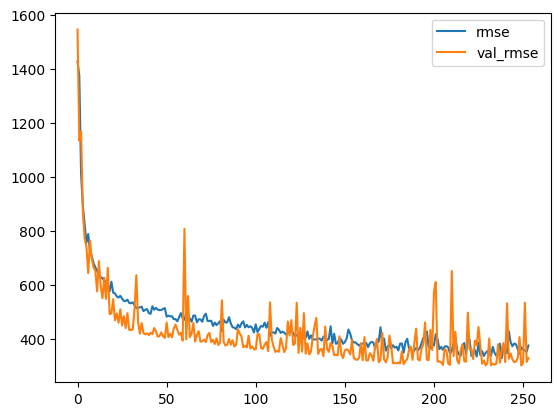

In [ ]:

plt.plot( r.history["rmse"], label="rmse" )
plt.plot( r.history["val_rmse"], label="val_rmse" )
plt.legend()


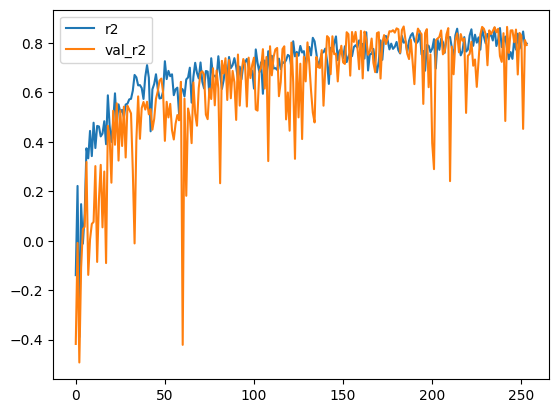

In [ ]:
plt.plot( r.history["r2"], label="r2" )
plt.plot( r.history["val_r2"], label="val_r2" )
plt.legend()

#### 7. Predições

In [ ]:
# Predição
y_pred = model.predict(x_test).flatten()

32/32 [==============================] - 0s 1ms/step


In [ ]:
# Cálculo das métricas de acurácia: mse, r2 e rmse
mse  = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2   = r2_score(y_test, y_pred)

In [ ]:
# Resultados das métricas de acurácia
print("mse     = ", mse)
print("rmse    = ", rmse)
print("r2      = ", r2)

mse     =  2563205.760518973
rmse    =  1601.0014867322807
r2      =  0.8330114295356988


---

# Fim do código